# Exploring Various Models

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from warnings import simplefilter
simplefilter(action='ignore', category=Warning)

## Importing Dataset

In [7]:
training_data_set = pd.read_csv('../data/processed_train.csv', header=0)
training_data_set.columns.values[0]='Sr_No'
X_train = training_data_set.drop('Transported',axis=1)
y_train = training_data_set['Transported']

testing_data_set = pd.read_csv('../data/processed_test.csv', header=0)
testing_data_set.columns.values[0]='Sr_No'
X_test = testing_data_set.drop('Transported',axis=1)
y_test = testing_data_set['Transported']

## Cat-Boost Model

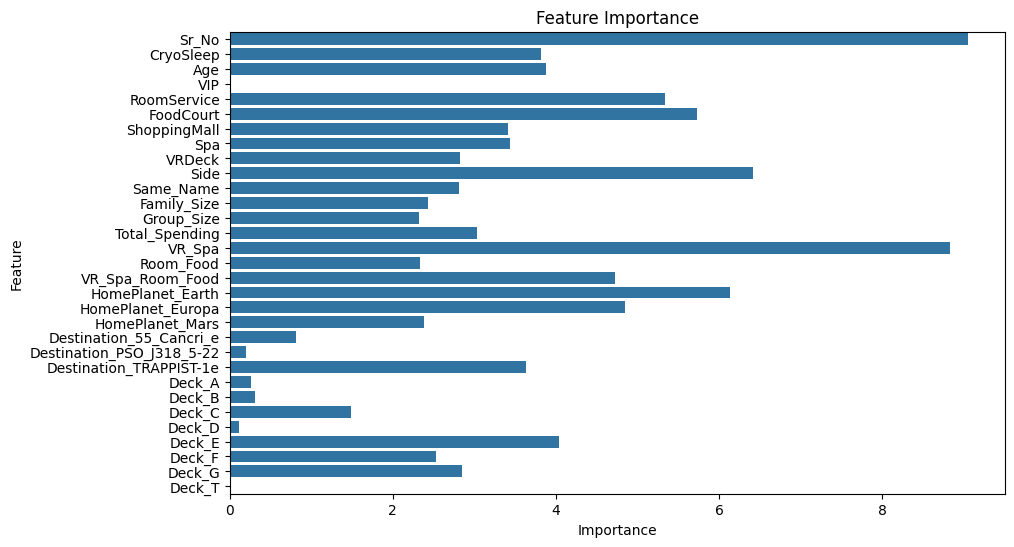

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       762
         1.0       0.78      0.82      0.80       750

    accuracy                           0.80      1512
   macro avg       0.80      0.80      0.80      1512
weighted avg       0.80      0.80      0.80      1512



In [8]:
from catboost import CatBoostClassifier,Pool

model = CatBoostClassifier(iterations=500, learning_rate=0.01,depth=10,verbose=0,allow_writing_files=False) 
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
pred = model.predict(X_test)
print(classification_report(y_test,pred))

## LightGBM Model

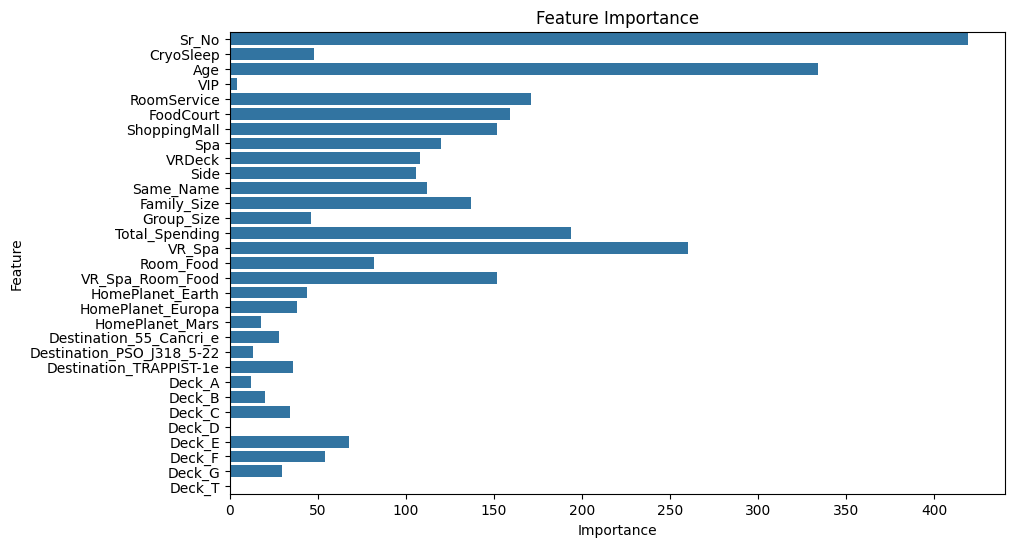

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81       762
         1.0       0.81      0.80      0.80       750

    accuracy                           0.80      1512
   macro avg       0.80      0.80      0.80      1512
weighted avg       0.80      0.80      0.80      1512



In [9]:
from lightgbm import LGBMClassifier
model=LGBMClassifier(verbose=0)
model.fit(X_train,y_train)
feature_importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

## XGBoost

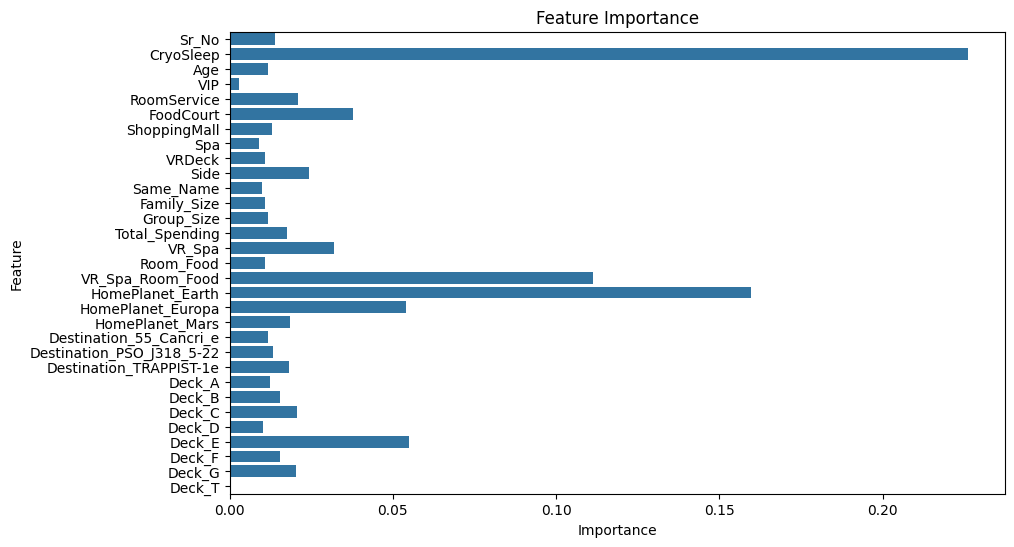

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       762
         1.0       0.80      0.78      0.79       750

    accuracy                           0.80      1512
   macro avg       0.80      0.80      0.80      1512
weighted avg       0.80      0.80      0.80      1512



In [10]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
feature_importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

## HistGB

In [11]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance
model = HistGradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80       762
         1.0       0.80      0.80      0.80       750

    accuracy                           0.80      1512
   macro avg       0.80      0.80      0.80      1512
weighted avg       0.80      0.80      0.80      1512



## MLP

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = [
        {
            'activation' : ['logistic', 'tanh', 'relu','sigmoid'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
        }
       ]

model = RandomizedSearchCV(MLPClassifier(), param_grid, cv=3, scoring='accuracy')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
print("Best parameters set found on development set:")
print(model.best_params_)


              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77       762
         1.0       0.78      0.70      0.74       750

    accuracy                           0.75      1512
   macro avg       0.76      0.75      0.75      1512
weighted avg       0.76      0.75      0.75      1512

Best parameters set found on development set:
{'solver': 'lbfgs', 'activation': 'relu'}


## ANN

In [13]:
import tensorflow as tf

X_train1 = tf.convert_to_tensor(X_train, dtype=tf.float64)
y_train1 = tf.convert_to_tensor(y_train, dtype=tf.float64)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))

# ann.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))

# ann.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train1, y_train1, batch_size=32, epochs=60)

X_test1 = tf.convert_to_tensor(X_test, dtype=tf.float64)
y_pred = model.predict(X_test1)
y_pred = (y_pred>0.5)
print(classification_report(y_test,y_pred))

Epoch 1/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 0.4960 - loss: 108.0062
Epoch 2/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.5943 - loss: 0.6638
Epoch 3/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.6394 - loss: 0.6380
Epoch 4/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.6307 - loss: 0.7398
Epoch 5/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.6583 - loss: 0.6479
Epoch 6/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.6792 - loss: 0.6263
Epoch 7/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.7028 - loss: 0.5735
Epoch 8/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.6781 - loss: 0.6060
Epoch 9/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.6841 - loss: 0.6405
Epoch 10/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.7166 - loss: 0.5812
Epoch 11/60
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.7165 - loss: 0.5798
Epoch 12/60
189/189 ━━━━━━━━